# 决策树

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取泰坦尼克号数据
titanic_data = pd.read_csv('../data/titanic.txt')

# 提取需要分析的列：pclass, age, sex 和 survived
titanic_subset = titanic_data[['pclass', 'age', 'sex', 'survived']].copy()  # 使用.copy()创建真实副本而非视图

# 修正警告：不使用链式赋值的inplace方法，直接赋值给DataFrame列
titanic_subset['age'] = titanic_subset['age'].fillna(titanic_subset['age'].mean())

# 准备数据
# 将性别转换为数值
titanic_subset['sex'] = titanic_subset['sex'].map({'male': 0, 'female': 1})

# 删除age_group列，因为我们已经有了age列
if 'age_group' in titanic_subset.columns:
    titanic_subset = titanic_subset.drop('age_group', axis=1)

# 删除含有缺失值的行
titanic_clean = titanic_subset.dropna()

# 分离特征和目标变量,将pclass转换为数值类型
X = titanic_clean.copy()
X['pclass'] = X['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
X = X[['pclass', 'age', 'sex']]
y = titanic_clean['survived']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# 训练决策树模型
dt_model = DecisionTreeClassifier(min_impurity_decrease=0.003)
dt_model.fit(X_train, y_train)

# 在测试集上评估模型
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n决策树模型准确率：{accuracy:.4f}")


决策树模型准确率：0.8389


# 随机森林

In [4]:
# 导入随机森林分类器
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 创建随机森林模型
rf_model = RandomForestClassifier(n_estimators=500, random_state=42,bootstrap=True,max_depth=3)

# 训练模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
rf_pred = rf_model.predict(X_test)

# 评估模型
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"\n随机森林模型准确率：{rf_accuracy:.4f}")


随机森林模型准确率：0.8571


# 网格搜索寻找最佳参数

Fitting 7 folds for each of 25 candidates, totalling 175 fits

最佳超参数组合: {'max_depth': 2, 'n_estimators': 300}
最佳交叉验证得分: 0.8150
最佳随机森林模型在测试集上的准确率: 0.8511

优化前随机森林准确率: 0.8571
优化后随机森林准确率: 0.8511
准确率提升: -0.61%


/var/folders/1f/d7sgbp1155l8kkgswvhg8frw0000gn/T/ipykernel_45637/1048504907.py:56: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/1f/d7sgbp1155l8kkgswvhg8frw0000gn/T/ipykernel_45637/1048504907.py:56: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/1f/d7sgbp1155l8kkgswvhg8frw0000gn/T/ipykernel_45637/1048504907.py:56: UserWarning: Glyph 25628 (\N{CJK UNIFIED IDEOGRAPH-641C}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/1f/d7sgbp1155l8kkgswvhg8frw0000gn/T/ipykernel_45637/1048504907.py:56: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/1f/d7sgbp1155l8kkgswvhg8frw0000gn/T/ipykernel_45637/1048504907.py:56: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/1f/d7sgbp1155l8kkgswvhg8frw0000gn/T/i

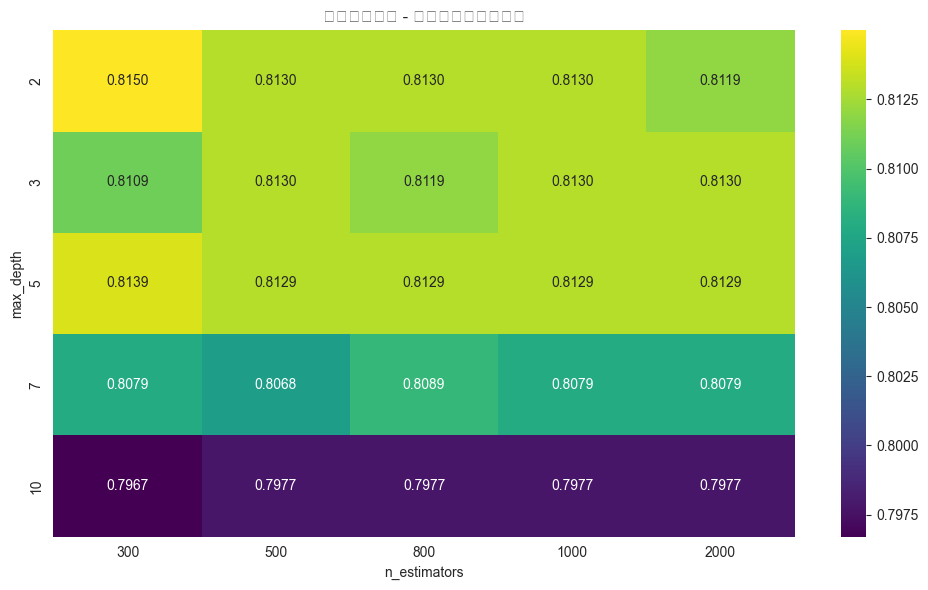

In [5]:
# 使用网格搜索为随机森林寻找最优超参数
from sklearn.model_selection import GridSearchCV

# 定义要搜索的超参数网格
param_grid = {
    'n_estimators': [ 300, 500, 800,1000,2000],
    'max_depth': [2,3, 5, 7, 10]
}

# 创建随机森林模型
rf = RandomForestClassifier(random_state=1)

# 创建网格搜索对象,verbose=1表示打印详细信息
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=7,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 在训练数据上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"\n最佳超参数组合: {grid_search.best_params_}")
print(f"最佳交叉验证得分: {grid_search.best_score_:.4f}")

# 使用最佳参数创建随机森林模型
best_rf_model = grid_search.best_estimator_

# 在测试集上评估最佳模型
best_rf_pred = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f"最佳随机森林模型在测试集上的准确率: {best_rf_accuracy:.4f}")

# 比较原始随机森林和调优后的随机森林
print(f"\n优化前随机森林准确率: {rf_accuracy:.4f}")
print(f"优化后随机森林准确率: {best_rf_accuracy:.4f}")
print(f"准确率提升: {(best_rf_accuracy-rf_accuracy)*100:.2f}%")

# 可视化网格搜索结果
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot_table(
    values='mean_test_score', 
    index='param_max_depth', 
    columns='param_n_estimators'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.4f')
plt.title('网格搜索结果 - 随机森林超参数调优')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.tight_layout()
plt.show()
